In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import io

In [3]:
%cd "C:\Users\srava\unsupervised\Mall_Customers"

C:\Users\srava\unsupervised\Mall_Customers


In [4]:
malldata=pd.read_csv("Mall_Customers.csv")

In [5]:
malldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# deleting the customerid column
malldata=malldata.drop("CustomerID",axis=1)

In [7]:
#encoding object column

In [8]:
malldata=pd.get_dummies(malldata,columns=["Gender"])

In [9]:
malldata.head()

,Age,Annual_Income_(k$),Spending_Score,Gender_Female,Gender_Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False
3,23,16,77,True,False
4,31,17,40,True,False


In [10]:
# importing KMeans Clustering
from sklearn.cluster import KMeans

In [11]:
#creating a list of WCSS(within cluster sum square distance)
# to know the k value using elbow plot
wcss_list=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,n_init="auto",random_state=42)
    kmeans.fit(malldata)
    wcss_list.append(kmeans.inertia_)

C:\Users\srava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\srava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\srava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\srava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

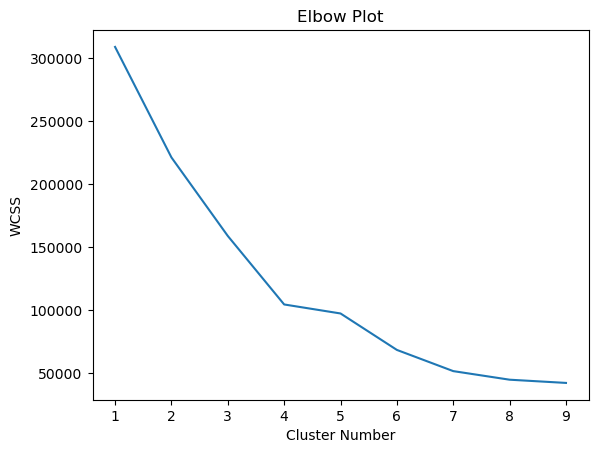

In [12]:
# optimal k value using Elbow plot
plt.plot(range(1,10),wcss_list)
plt.title("Elbow Plot")
plt.xlabel("Cluster Number")
plt.ylabel("WCSS")
plt.show()

In [13]:
# Silhouette Coefficient or silhouette score is a metric used to 
# calculate the goodness of a clustering technique. 
# Its value ranges from -1 to 1. 
# 1: Means clusters are well apart from each other and clearly 
# distinguished.
# 0: Means clusters are indifferent, or we can say that the 
# distance between clusters is not significant.
# -1: Means clusters are assigned in the wrong way.

In [14]:
# importing silhouette 
from sklearn.metrics import silhouette_score

In [15]:
clust4model=KMeans(n_clusters=4,n_init="auto")

In [16]:
clust4model=clust4model.fit(malldata)

C:\Users\srava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
silhouette_score(malldata,clust4model.labels_)

0.3919819871595776

In [18]:
pd.DataFrame(clust4model.labels_).value_counts()

1    69
2    53
0    40
3    38
Name: count, dtype: int64

In [19]:
malldata.columns

Index(['Age', 'Annual_Income_(k$)', 'Spending_Score', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

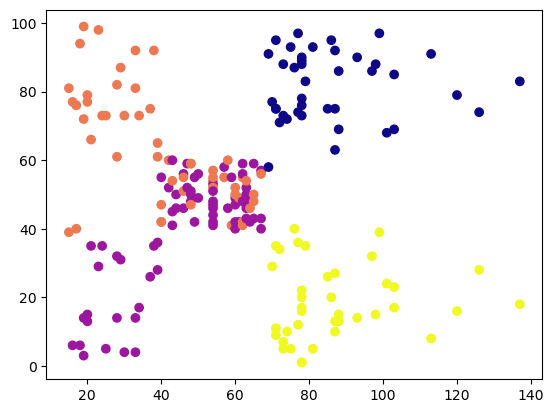

In [20]:
plt.scatter(malldata["Annual_Income_(k$)"],malldata["Spending_Score"],c=clust4model.labels_,cmap="plasma")

In [21]:
clust4model.cluster_centers_

array([[32.875     , 86.1       , 81.525     ,  0.55      ,  0.45      ],
       [52.05797101, 46.42028986, 39.88405797,  0.5942029 ,  0.4057971 ],
       [25.05660377, 40.73584906, 62.62264151,  0.58490566,  0.41509434],
       [40.39473684, 87.        , 18.63157895,  0.47368421,  0.52631579]])

In [22]:
# unsupervised lesrning clustring techniques - Hierarical clustering
# clustering which groups data into a hierarchy of clusters in form of a tree called dendogram
# distance methods are similar to KMeans

# Two approaches are used in hierarchical clustering
# Agglomerative clustering and divisive 
# agglomerative clustering- Bottom up approach which starts by taking all the data points as a single and merging them till one cluster is left.
# top down approach which starts by taking all data points as a single cluster

# Agglomerative Hierarchical clustering (Most used method and default)
# -> Bottom-up stategy
# -> Each cluster start with only one object.


# Hierarichal clustering - linkages- How distance is calculated between observations in clusters.
# single(Minimum distance or distance between closest elements in clusters)
# complete(Maximum distance between elements in clusters) 
# average(average of the distance of all pairs)
# centroid()


In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
h_clust=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')# affinity= or metric=

In [25]:
h_clust_model=h_clust.fit(malldata)

C:\Users\srava\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [26]:
h_clust_model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [27]:
pd.DataFrame(h_clust_model.labels_).value_counts()

0    83
2    39
1    35
4    23
3    20
Name: count, dtype: int64

In [28]:
import scipy.cluster.hierarchy as sch
from sklearn.metrics.pairwise import euclidean_distances

In [29]:
X_euclidean=euclidean_distances(malldata)

C:\Users\srava\AppData\Local\Temp\ipykernel_5356\1250956134.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendogram=sch.dendrogram(sch.linkage(X_euclidean,method='ward'))


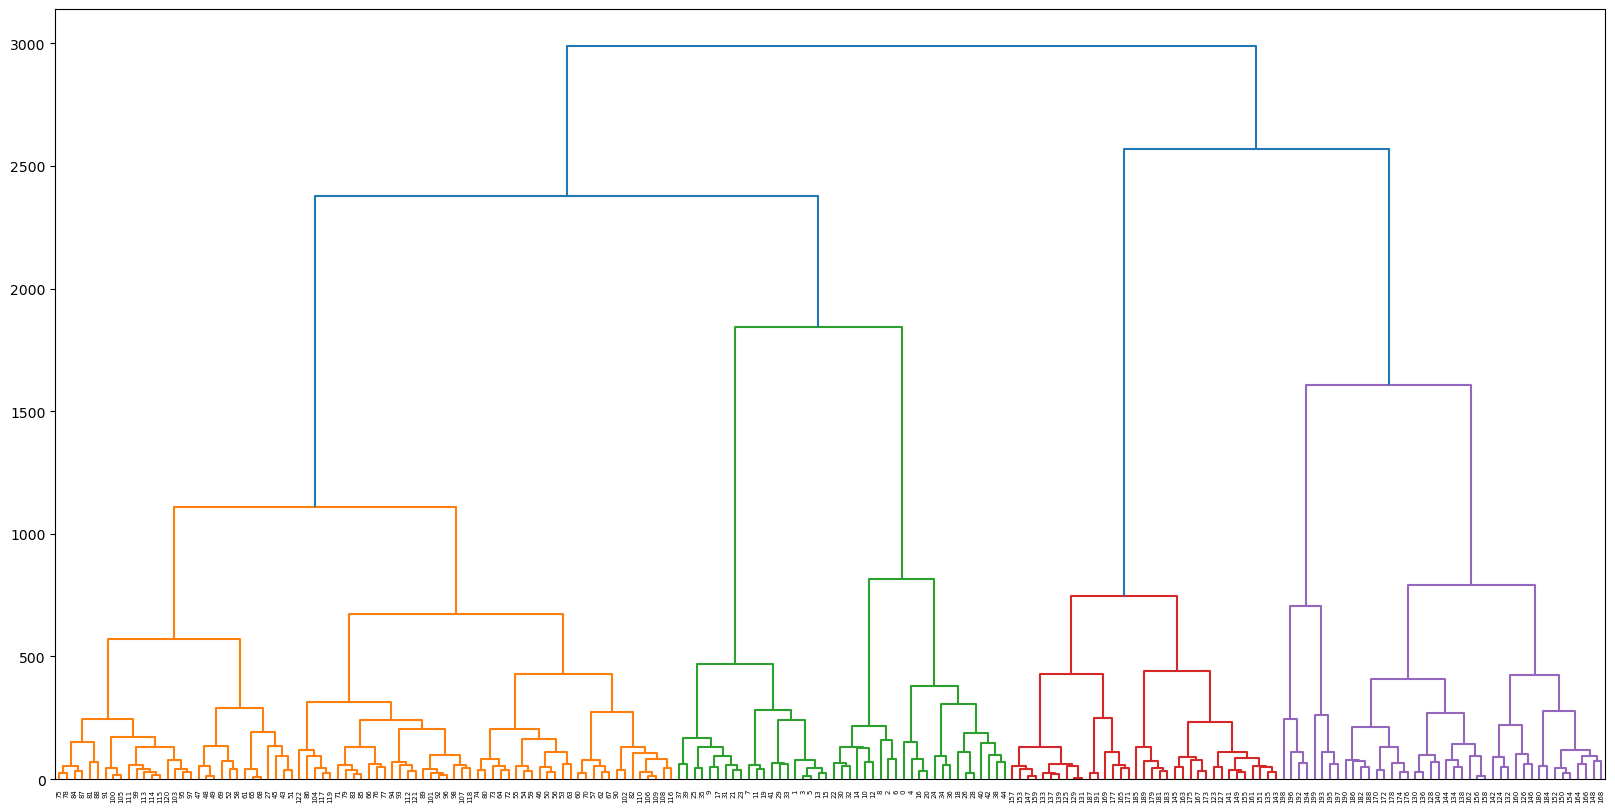

In [30]:
plt.figure(figsize=(20,10))
dendogram=sch.dendrogram(sch.linkage(X_euclidean,method='ward'))

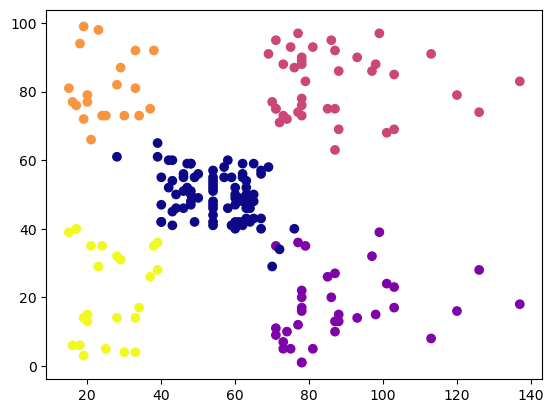

In [31]:
plt.scatter(malldata['Annual_Income_(k$)'],malldata['Spending_Score'],c=h_clust_model.labels_,cmap='plasma')

In [32]:
# clustering- DBSCAN which is a density based clustering method that clusters data points by seperating between high density regions to low density regions.
# DBSCAN doesnot require the specifications of number of clusters
# DBSCAN by default uses Euclidean distance for distance calculations 
# DBSCAN is good at detecting outliers

# DBSCAn requires 2 parameters 
# Epsilon(eps) - least distacne required for 2 points to be termed as neighbours
# MiPoints - Minimum points needed to construct a cluster
# A cluster is recognized only when the number of points is greater than or equal to MinPoints.

# There are 3 tyoes of points in DBSCAN 
#1) core - point from which 2 parameters are fullu defined
#2) Border - any datapoint that is not core
#3) Noise- point with less than MinPoints

# EPS is vary important 

In [33]:
# For identifying eps or epsilon,nearest neighbours algorithm is used
# the value of minpoints should be least on greater than the number of dimensions of the dataset, i.e.,
# minpoints>=Dimensions+1. Dimensions is variables or columns

In [34]:
from sklearn.neighbors import NearestNeighbors

In [35]:
nei=NearestNeighbors(n_neighbors=5)

In [36]:
nbrs=nei.fit(malldata)

In [37]:
distances,indices=nbrs.kneighbors(malldata)

In [38]:
distances=np.sort(distances[:,1])

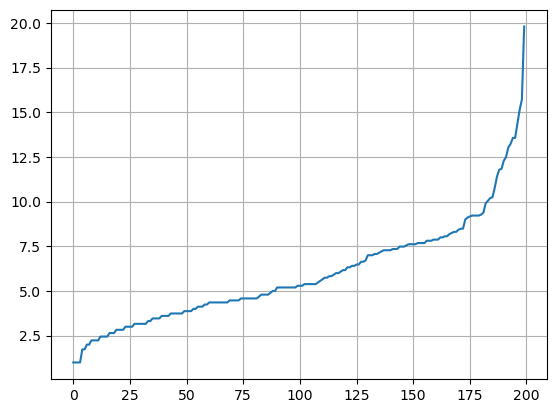

In [39]:
plt.plot(distances)
plt.grid()

In [40]:
# Eplison- 14 - point at which distance is stagnating
# minpoints-5

In [41]:
from sklearn.cluster import DBSCAN

In [42]:
dbs=DBSCAN(eps=14,min_samples=5).fit(malldata)

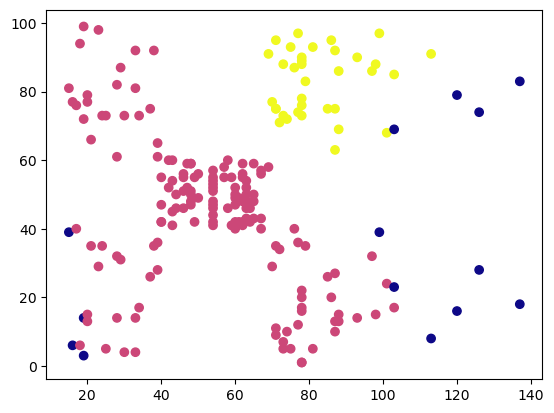

In [43]:
plt.scatter(malldata['Annual_Income_(k$)'],malldata['Spending_Score'],c=dbs.labels_,cmap='plasma')